# NLP Basics and Language Modeling

## Setting Up Necessary Things

In [1]:
# Jupyter Notebook Magic Command - Auto Reloading
%reload_ext autoreload
%autoreload 2

# Jupyter Notebook Magic Command - Inline Plotting
%matplotlib inline

In [2]:
# Ignore All Warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# NVIDIA Status
! nvidia-smi

Wed Aug 16 17:00:58 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd /content/drive/MyDrive/Colab Notebooks/TC.Video.Game

/content/drive/MyDrive/Colab Notebooks/TC.Video.Game


## Necessary Imports

In [6]:
! pip install -Uqq fastai nbdev fastbook

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 46.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 36.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 54.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 87.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [7]:
from fastai.text.all import *

## Data Collection

In [8]:
# Load Data Into DataFrame
df = pd.read_csv("data/raw_data/game_details.csv")
df.head()

,Name,Summary,Genres
0,The Legend of Zelda: Ocarina of Time,"As a young boy, Link is tricked by Ganondorf, the King of the Gerudo Thieves. The evil human uses Link to gain access to the Sacred Realm, where he places his tainted hands on Triforce and transforms the beautiful Hyrulean landscape into a barren wasteland. Link is determined to fix the problems he helped to create, so with the help of Rauru he travels through time gathering the powers of the Seven Sages.","['Action Adventure', 'Fantasy']"
1,Tony Hawk's Pro Skater 2,"As most major publishers' development efforts shift to any number of next-generation platforms, Tony Hawk 2 will likely stand as one of the last truly fantastic games to be released on the PlayStation.","['Sports', 'Alternative', 'Skateboarding']"
2,Grand Theft Auto IV,"[Metacritic's 2008 PS3 Game of the Year; Also known as ""GTA IV""] What does the American Dream mean today? For Niko Belic, fresh off the boat from Europe. It's the hope he can escape his past. For his cousin, Roman, it is the vision that together they can find fortune in Liberty City, gateway to the land of opportunity. As they slip into debt and are dragged into a criminal underworld by a series of shysters, thieves and sociopaths, they discover that the reality is very different from the dream in a city that worships money and status, and is heaven for those who have them an a living nigh...","['Action Adventure', 'Modern', 'Modern', 'Open-World']"
3,SoulCalibur,"This is a tale of souls and swords, transcending the world and all its history, told for all eternity... The greatest weapons-based fighter returns, this time on Sega Dreamcast. Soul Calibur unleashes incredible graphics, fantastic fighters, and combos so amazing they'll make your head spin!","['Action', 'Fighting', '3D']"
4,Grand Theft Auto IV,"[Metacritic's 2008 Xbox 360 Game of the Year; Also known as ""GTA IV""] What does the American Dream mean today? For Niko Belic, fresh off the boat from Europe. It's the hope he can escape his past. For his cousin, Roman, it is the vision that together they can find fortune in Liberty City, gateway to the land of opportunity. As they slip into debt and are dragged into a criminal underworld by a series of shysters, thieves and sociopaths, they discover that the reality is very different from the dream in a city that worships money and status, and is heaven for those who have them an a living...","['Action Adventure', 'Modern', 'Modern', 'Open-World']"


In [9]:
# Shape of the DataFrame
df.shape

(20406, 3)

### Total Number of Genres

In [10]:
genres_list = df["Genres"].to_list()    # list of all the genres
genres_count = {}                       # count of all the genres

for genres in genres_list:
    genre_list = eval(genres)

    for genre in genre_list:
        if genre in genres_count.keys():
            genres_count[genre] += 1
        else:
            genres_count[genre] = 1

In [11]:
print("Total Number of Genres: ", len(genres_count))

sorted_genres_count = dict(sorted(genres_count.items(), key=lambda item: item[1], reverse=True))
print("Individual Genres Count: \n", sorted_genres_count)

Total Number of Genres:  178
Individual Genres Count: 
 {'Action': 7097, 'General': 7035, 'Shooter': 3549, 'Action Adventure': 3424, 'Platformer': 2371, 'Arcade': 2355, 'Role-Playing': 2341, '3D': 2127, 'Adventure': 1995, '2D': 1979, 'Miscellaneous': 1927, 'Strategy': 1905, 'First-Person': 1875, 'Sci-Fi': 1779, 'Fantasy': 1729, 'Sports': 1727, 'Modern': 1569, 'Puzzle': 1376, 'Action RPG': 1300, 'Racing': 1239, 'Sim': 1162, 'Simulation': 1160, 'Third-Person': 1040, 'Traditional': 1015, 'Driving': 971, 'Historic': 915, 'Fighting': 838, 'Automobile': 782, 'Real-Time': 772, 'Turn-Based': 740, 'Open-World': 736, "Beat-'Em-Up": 713, 'Team': 619, 'Compilation': 546, 'Survival': 544, 'Individual': 450, "Shoot-'Em-Up": 433, 'Point-and-Click': 430, 'Horror': 419, 'Japanese-Style': 415, 'Music': 411, 'Tactical': 405, 'Tactics': 392, 'Combat': 382, 'Linear': 353, 'Console-style RPG': 346, 'Rhythm': 340, 'Management': 334, 'GT / Street': 283, 'Western-Style': 279, 'Soccer': 276, 'Scrolling': 264, '

### Using Only 1st Category of the Genres: Single-Label Classification

In [12]:
primary_genre_list = []    # only first genre
indices_to_drop = []       # empty genre indices drop

for idx, genres in enumerate(df["Genres"].to_list()):
    genres_list = eval(genres)

    if len(genres_list) != 0:
        primary_genre_list.append(genres_list[0])
    else:
        indices_to_drop.append(idx)

In [13]:
# Total Primary Genres
print("Total Primary Genres: ", len(primary_genre_list))
print(primary_genre_list)

# Total Indices to Drop
print("Total Indices to Drop: ", len(indices_to_drop))

Total Primary Genres:  19894
['Action Adventure', 'Sports', 'Action Adventure', 'Action', 'Action Adventure', 'Action Adventure', 'Sports', 'Action Adventure', 'Action', 'Action Adventure', 'Action Adventure', 'Sports', 'Action Adventure', 'Action', 'Action Adventure', 'Action Adventure', 'Sports', 'Action Adventure', 'Action', 'Action Adventure', 'Action', 'Action', 'Action Adventure', 'Action Adventure', 'Modern', 'Role-Playing', 'Modern', 'Sports', 'Action Adventure', 'Role-Playing', 'Sports', 'Action', 'Action Adventure', 'Action Adventure', 'Action', 'Action Adventure', 'Action', 'Action', 'Sports', 'Action', 'Modern', 'Fantasy', 'Action', 'Action', 'Action Adventure', 'Action Adventure', 'Action', 'Action', 'Action Adventure', 'Action', 'Role-Playing', 'Role-Playing', 'Adventure', 'Action Adventure', 'Role-Playing', 'Action', 'Role-Playing', 'Action Adventure', 'Action Adventure', 'Driving', 'Action Adventure', 'Action', 'Action Adventure', 'Miscellaneous', 'Miscellaneous', 'Role

In [14]:
# Drop Empty Genre Data
df = df.drop(indices_to_drop).reset_index(drop=True)

In [15]:
# Create a Column Named Primary Genre
df["Primary Genre"] = primary_genre_list

In [16]:
# Individual Primary Genre Values Count
print("Primary Genre Value Count: ")
df["Primary Genre"].value_counts()

Primary Genre Value Count: 


Action                6436
Action Adventure      2579
Role-Playing          2081
Sports                1620
Strategy              1608
                      ... 
Party / Minigame         1
Survival                 1
Street                   1
Dancing                  1
Online Multiplayer       1
Name: Primary Genre, Length: 70, dtype: int64

In [17]:
# After Inserting Primary Genre
df.head()

,Name,Summary,Genres,Primary Genre
0,The Legend of Zelda: Ocarina of Time,"As a young boy, Link is tricked by Ganondorf, the King of the Gerudo Thieves. The evil human uses Link to gain access to the Sacred Realm, where he places his tainted hands on Triforce and transforms the beautiful Hyrulean landscape into a barren wasteland. Link is determined to fix the problems he helped to create, so with the help of Rauru he travels through time gathering the powers of the Seven Sages.","['Action Adventure', 'Fantasy']",Action Adventure
1,Tony Hawk's Pro Skater 2,"As most major publishers' development efforts shift to any number of next-generation platforms, Tony Hawk 2 will likely stand as one of the last truly fantastic games to be released on the PlayStation.","['Sports', 'Alternative', 'Skateboarding']",Sports
2,Grand Theft Auto IV,"[Metacritic's 2008 PS3 Game of the Year; Also known as ""GTA IV""] What does the American Dream mean today? For Niko Belic, fresh off the boat from Europe. It's the hope he can escape his past. For his cousin, Roman, it is the vision that together they can find fortune in Liberty City, gateway to the land of opportunity. As they slip into debt and are dragged into a criminal underworld by a series of shysters, thieves and sociopaths, they discover that the reality is very different from the dream in a city that worships money and status, and is heaven for those who have them an a living nigh...","['Action Adventure', 'Modern', 'Modern', 'Open-World']",Action Adventure
3,SoulCalibur,"This is a tale of souls and swords, transcending the world and all its history, told for all eternity... The greatest weapons-based fighter returns, this time on Sega Dreamcast. Soul Calibur unleashes incredible graphics, fantastic fighters, and combos so amazing they'll make your head spin!","['Action', 'Fighting', '3D']",Action
4,Grand Theft Auto IV,"[Metacritic's 2008 Xbox 360 Game of the Year; Also known as ""GTA IV""] What does the American Dream mean today? For Niko Belic, fresh off the boat from Europe. It's the hope he can escape his past. For his cousin, Roman, it is the vision that together they can find fortune in Liberty City, gateway to the land of opportunity. As they slip into debt and are dragged into a criminal underworld by a series of shysters, thieves and sociopaths, they discover that the reality is very different from the dream in a city that worships money and status, and is heaven for those who have them an a living...","['Action Adventure', 'Modern', 'Modern', 'Open-World']",Action Adventure


### Removing Rare Genres

In [18]:
genre_count = df["Primary Genre"].value_counts()
threshold = int(len(df) * 0.004)

rare_genres = [item for item, count in genre_count.items() if count < threshold]

print("Total Rare Genres: ", len(rare_genres))

Total Rare Genres:  58


In [19]:
# Rare indices to drop
rare_indices_to_drop = [index for index, row in df.iterrows() if row["Primary Genre"] in rare_genres]

print("Total Rare Indices to Drop: ", len(rare_indices_to_drop))

Total Rare Indices to Drop:  493


In [20]:
# Drop Rare Genres
df = df.drop(rare_indices_to_drop).reset_index(drop=True)

In [21]:
# Shape After Dropping Rare Genres
df.shape

(19401, 4)

In [22]:
# Show Remaining Primary Genres
print("Total Remaining Genres Count: ", len(df["Primary Genre"].value_counts()))

print("Individual Genres Count: ")
df["Primary Genre"].value_counts()

Total Remaining Genres Count:  12
Individual Genres Count: 


Action              6436
Action Adventure    2579
Role-Playing        2081
Sports              1620
Strategy            1608
Miscellaneous       1366
Adventure           1346
Driving              921
Simulation           640
Racing               355
General              249
Puzzle               200
Name: Primary Genre, dtype: int64

In [23]:
# Drop Genres Column
df.drop(["Genres"], axis = 1, inplace = True)

In [24]:
# Drop Duplicate Summary from the DataFrame
df = df.drop_duplicates(subset = "Summary", keep='first')

In [25]:
# Description of The DataFrame
df.describe(include="object")

,Name,Summary,Primary Genre
count,15038,15037,15038
unique,12412,15037,12
top,MX vs. ATV Untamed,"As a young boy, Link is tricked by Ganondorf, the King of the Gerudo Thieves. The evil human uses Link to gain access to the Sacred Realm, where he places his tainted hands on Triforce and transforms the beautiful Hyrulean landscape into a barren wasteland. Link is determined to fix the problems he helped to create, so with the help of Rauru he travels through time gathering the powers of the Seven Sages.",Action
freq,6,1,4916


## Data Processing

### Tokenization

In [26]:
# Take first summary
summary = df["Summary"][0]
summary[:110]

'As a young boy, Link is tricked by Ganondorf, the King of the Gerudo Thieves. The evil human uses Link to gain'

#### White Space Tokenization

In [27]:
summary[:50].split()

['As',
 'a',
 'young',
 'boy,',
 'Link',
 'is',
 'tricked',
 'by',
 'Ganondorf,',
 'the']

#### Spacy Tokenizer

In [28]:
doc(SpacyTokenizer)

In [29]:
spacy = SpacyTokenizer()

tokens = first(spacy([summary[:110]]))
tokens

(#25) ['As','a','young','boy',',','Link','is','tricked','by','Ganondorf'...]

In [30]:
# Show All 25 Tokens
print(coll_repr(tokens, 25))

(#25) ['As','a','young','boy',',','Link','is','tricked','by','Ganondorf',',','the','King','of','the','Gerudo','Thieves','.','The','evil','human','uses','Link','to','gain']


#### Fastai's Tokenizer
Takes `SpacyTokenizer` as a parameter.

In [31]:
tokenizer = Tokenizer(spacy)

print(coll_repr(tokenizer(summary[:110]), 34))

(#34) ['xxbos','xxmaj','as','a','young','boy',',','xxmaj','link','is','tricked','by','xxmaj','ganondorf',',','the','xxmaj','king','of','the','xxmaj','gerudo','xxmaj','thieves','.','xxmaj','the','evil','human','uses','xxmaj','link','to','gain']


In [32]:
# Adds These Process To Tokenization by Default - Fastai's Tokenizer
defaults.text_proc_rules

[<function fastai.text.core.fix_html(x)>,
 <function fastai.text.core.replace_rep(t)>,
 <function fastai.text.core.replace_wrep(t)>,
 <function fastai.text.core.spec_add_spaces(t)>,
 <function fastai.text.core.rm_useless_spaces(t)>,
 <function fastai.text.core.replace_all_caps(t)>,
 <function fastai.text.core.replace_maj(t)>,
 <function fastai.text.core.lowercase(t, add_bos=True, add_eos=False)>]

#### Subword Tokenization

In [33]:
doc(SentencePieceTokenizer)

In [34]:
# Get Corpus
corpus = df["Summary"][:1000]

In [35]:
# Create Subword Function
def subword(vocabulary_size):
    sp_tokenizer = SentencePieceTokenizer(vocab_sz=vocabulary_size)
    sp_tokenizer.setup(corpus)                                          # Created Corpus to Create Subword Vocabulary
    return " ".join(first(sp_tokenizer([summary]))[:50])

In [36]:
subword(500)

'▁A s ▁a ▁you ng ▁bo y , ▁Link ▁is ▁t ri ck ed ▁by ▁G an on d or f , ▁the ▁K ing ▁of ▁the ▁G er u d o ▁Thi e ve s . ▁The ▁evil ▁human ▁use s ▁Link ▁to ▁g a in ▁a c ce'

In [37]:
subword(1000)

'▁A s ▁a ▁you ng ▁bo y , ▁Link ▁is ▁t ri ck ed ▁by ▁G an on d or f , ▁the ▁K ing ▁of ▁the ▁G er u d o ▁Thi e ve s . ▁The ▁evil ▁human ▁use s ▁Link ▁to ▁g a in ▁access ▁to ▁the'

In [38]:
subword(10_000)

'▁As ▁a ▁young ▁boy , ▁Link ▁is ▁trick ed ▁by ▁Ganondorf , ▁the ▁King ▁of ▁the ▁Ger udo ▁Thieves . ▁The ▁evil ▁human ▁use s ▁Link ▁to ▁gain ▁access ▁to ▁the ▁Sacr ed ▁Realm , ▁where ▁he ▁places ▁his ▁ tain ted ▁hands ▁on ▁Tri force ▁and ▁transform s ▁the'

### Numericalization
Process of mapping tokens into integers. We use the vocabulary index to map this.

In [39]:
# Tokenization - Fastai's
tokenizer = Tokenizer(spacy)

print(coll_repr(tokenizer(summary[:110]), 34))

(#34) ['xxbos','xxmaj','as','a','young','boy',',','xxmaj','link','is','tricked','by','xxmaj','ganondorf',',','the','xxmaj','king','of','the','xxmaj','gerudo','xxmaj','thieves','.','xxmaj','the','evil','human','uses','xxmaj','link','to','gain']


In [40]:
# Get Corpus
corpus = df["Summary"][:1000]

In [41]:
tokens = corpus[:100].map(tokenizer)
tokens[0]

(#97) ['xxbos','xxmaj','as','a','young','boy',',','xxmaj','link','is'...]

In [42]:
doc(Numericalize)

In [43]:
num = Numericalize()
num.setup(tokens)
coll_repr(num.vocab, 20)

"(#832) ['xxunk','xxpad','xxbos','xxeos','xxfld','xxrep','xxwrep','xxup','xxmaj','the',',','.','and','of','a','to','-','in','new','with'...]"

In [44]:
# Encoding
nums = num(tokens[0])
nums

TensorText([  2,   8,  23,  14, 429, 263,  10,   8,  55,  21,   0,  36,   8,
              0,  10,   9,   8,   0,  13,   9,   8,   0,   8, 124,  11,   8,
              9,  91, 325,   0,   8,  55,  15,   0, 430,  15,   9,   8,   0,
              8, 585,  10, 139,  43, 431,  34,   0, 227,  32,   8,   0,  12,
            586,   9, 587,   8,   0, 588,  39,  14,   0,   0,  11,   8,  55,
             21,   0,  15,   0,   9,   0,  43,   0,  15, 201,  10, 116,  19,
              9, 140,  13,   8,   0,  43, 589,  61,  56,   0,   9, 590,  13,
              9,   8,   0,   8,   0,  11])

In [45]:
# First Corpus
corpus[0]

'As a young boy, Link is tricked by Ganondorf, the King of the Gerudo Thieves. The evil human uses Link to gain access to the Sacred Realm, where he places his tainted hands on Triforce and transforms the beautiful Hyrulean landscape into a barren wasteland. Link is determined to fix the problems he helped to create, so with the help of Rauru he travels through time gathering the powers of the Seven Sages.'

In [46]:
# Decoding
" ".join(num.vocab[word] for word in nums)

'xxbos xxmaj as a young boy , xxmaj link is xxunk by xxmaj xxunk , the xxmaj xxunk of the xxmaj xxunk xxmaj thieves . xxmaj the evil human xxunk xxmaj link to xxunk access to the xxmaj xxunk xxmaj realm , where he places his xxunk hands on xxmaj xxunk and transforms the beautiful xxmaj xxunk landscape into a xxunk xxunk . xxmaj link is xxunk to xxunk the xxunk he xxunk to create , so with the help of xxmaj xxunk he travels through time xxunk the powers of the xxmaj xxunk xxmaj xxunk .'

In [47]:
# Check Numerical Value To Corpus
num.vocab[429]

'young'

## Language Modeling (LM)

### Preparing Data for LMs

In [48]:
dls_lm = TextDataLoaders.from_df(
    df,
    text_col="Summary",
    is_lm=True,
    bs=16,                                              # bs: batch size
    seq_len=512,                                        # seq_len: maximum sequence length
    splitter=RandomSplitter(valid_pct=0.1, seed=42)
)

In [49]:
dls_lm.show_batch(max_n=3)

,text,text_
0,"xxbos xxmaj gamers will take on the miniature role of a lost xxmaj sour xxmaj patch xxmaj kid in a stylized human - sized world , guiding the hero through the sticky floors of a movie theater , across the counter of a concession stand , and other unique and oversized environments . xxmaj joining forces with fellow lost xxmaj sour xxmaj patch xxmaj kids , players will use a combination of jumps , twists and puzzle - solving to negotiate and overcome larger than life obstacles . xxmaj along the way , they will battle unusual candy enemies , escape from deranged humans , and face - off against bizarre creatures including one very angry wad of sticky chewing gum . xxbos xxmaj mix all the intensity of classic pinball with the sights , sounds , and xxunk of war and what do you get ? xxmaj xxunk --","xxmaj gamers will take on the miniature role of a lost xxmaj sour xxmaj patch xxmaj kid in a stylized human - sized world , guiding the hero through the sticky floors of a movie theater , across the counter of a concession stand , and other unique and oversized environments . xxmaj joining forces with fellow lost xxmaj sour xxmaj patch xxmaj kids , players will use a combination of jumps , twists and puzzle - solving to negotiate and overcome larger than life obstacles . xxmaj along the way , they will battle unusual candy enemies , escape from deranged humans , and face - off against bizarre creatures including one very angry wad of sticky chewing gum . xxbos xxmaj mix all the intensity of classic pinball with the sights , sounds , and xxunk of war and what do you get ? xxmaj xxunk -- the"
1,"carmen from unearthing the drums and making off with the lost treasure . xxbos xxmaj you ’ve inherited your uncle ’s potion shop — and a huge debt . xxmaj better get brewing ! xxmaj customize your store , hire heroes to gather ingredients , befriend ( or romance ) fellow vendors to learn new xxunk strategies , and go head - to - head with competitors in this narrative - driven , deck - building shop simulator . xxbos xxmaj designed specifically to entertain both casual and hardcore gamers with its deep immersion , five to fifteen minute play sessions and turn - based play style , xxmaj puzzle xxmaj quest : xxmaj challenge of the xxmaj warlords incorporates strategy , role - playing elements and a persistent storyline in a puzzle board setting . xxmaj set in the xxmaj warlords universe , the game challenges players to create","from unearthing the drums and making off with the lost treasure . xxbos xxmaj you ’ve inherited your uncle ’s potion shop — and a huge debt . xxmaj better get brewing ! xxmaj customize your store , hire heroes to gather ingredients , befriend ( or romance ) fellow vendors to learn new xxunk strategies , and go head - to - head with competitors in this narrative - driven , deck - building shop simulator . xxbos xxmaj designed specifically to entertain both casual and hardcore gamers with its deep immersion , five to fifteen minute play sessions and turn - based play style , xxmaj puzzle xxmaj quest : xxmaj challenge of the xxmaj warlords incorporates strategy , role - playing elements and a persistent storyline in a puzzle board setting . xxmaj set in the xxmaj warlords universe , the game challenges players to create ,"
2,"of art only to return them days later . xxmaj dive into xxmaj raphael 's world and help him find the xxmaj xxunk of xxmaj xxunk to unmask the mystery behind his father 's disappearance . xxmaj while unravelling the truth players will encounter an assortment of different rhythm challenges to master . xxmaj tap the screen , swipe the stylus and control the gyro to the beat of the music to maneuver xxmaj raphael through the unique streets of xxmaj paris , brought to life by stylish animations and vibrant 3d maps and landscapes . xxbos xxmaj independent two - man studio xxmaj mad xxmaj xxunk brings you xxmaj aaero , a game that xxunk high - speed sci - fi shooting action with immersive music eleme

In [50]:
torch.save(dls_lm, "dataloaders/lm_dls.pkl")

In [51]:
# dls_lm = torch.load("../dataloaders/lm_dls.pkl")

### Modeling

In [52]:
# This is a pretrained LSTM model on Wikipedia Corpus
doc(AWD_LSTM)

In [53]:
doc(language_model_learner)

In [54]:
doc(Perplexity)

In [55]:
learner = language_model_learner(
    dls_lm,
    AWD_LSTM,
    drop_mult=0.3,
    metrics=[accuracy, Perplexity()]
).to_fp16()

In [56]:
learner.model

SequentialRNN(
  (0): AWD_LSTM(
    (encoder): Embedding(19496, 400, padding_idx=1)
    (encoder_dp): EmbeddingDropout(
      (emb): Embedding(19496, 400, padding_idx=1)
    )
    (rnns): ModuleList(
      (0): WeightDropout(
        (module): LSTM(400, 1152, batch_first=True)
      )
      (1): WeightDropout(
        (module): LSTM(1152, 1152, batch_first=True)
      )
      (2): WeightDropout(
        (module): LSTM(1152, 400, batch_first=True)
      )
    )
    (input_dp): RNNDropout()
    (hidden_dps): ModuleList(
      (0-2): 3 x RNNDropout()
    )
  )
  (1): LinearDecoder(
    (decoder): Linear(in_features=400, out_features=19496, bias=True)
    (output_dp): RNNDropout()
  )
)

In [62]:
# Vocabulary Size
print("Vocabulary Size of the Model: ",len(dls_lm.vocab))

Vocabulary Size of the Model:  19496


#### Stage: 0

In [57]:
learner.freeze()

SuggestedLRs(slide=0.007585775572806597, valley=0.0030199517495930195)

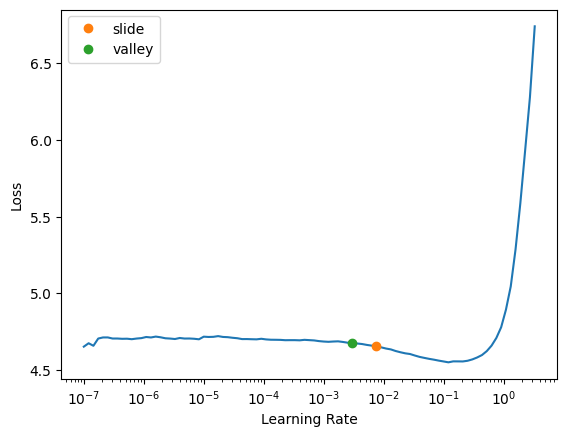

In [58]:
learner.lr_find(suggest_funcs=(slide, valley))

In [59]:
learner.fit_one_cycle(1, 6e-3)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,4.025788,3.876759,0.324582,48.267540,01:10


In [63]:
learner.save("lm-stage-0")

Path('models/lm-stage-0.pth')

In [64]:
# learner.load("lm-stage-0")

#### Stage: 1

In [65]:
learner.unfreeze()

SuggestedLRs(slide=0.0002754228771664202, valley=0.00013182566908653826)

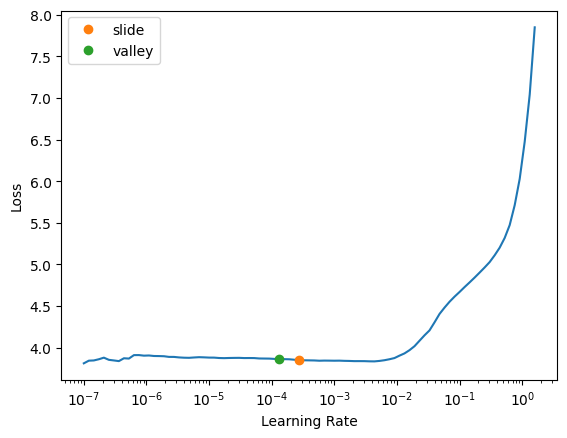

In [67]:
learner.lr_find(suggest_funcs=(slide, valley))

In [68]:
learner.fit_one_cycle(5, slice(2.25e-4, 1.75e-4))

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,3.784651,3.781254,0.333631,43.871002,01:15
1,3.685288,3.709859,0.341169,40.848053,01:12
2,3.609253,3.676070,0.344920,39.490898,01:11
3,3.557539,3.663031,0.346837,38.979305,01:13
4,3.534360,3.661543,0.347064,38.921349,01:12


### Save the Encoder

In [69]:
learner.model

SequentialRNN(
  (0): AWD_LSTM(
    (encoder): Embedding(19496, 400, padding_idx=1)
    (encoder_dp): EmbeddingDropout(
      (emb): Embedding(19496, 400, padding_idx=1)
    )
    (rnns): ModuleList(
      (0): WeightDropout(
        (module): LSTM(400, 1152, batch_first=True)
      )
      (1): WeightDropout(
        (module): LSTM(1152, 1152, batch_first=True)
      )
      (2): WeightDropout(
        (module): LSTM(1152, 400, batch_first=True)
      )
    )
    (input_dp): RNNDropout()
    (hidden_dps): ModuleList(
      (0-2): 3 x RNNDropout()
    )
  )
  (1): LinearDecoder(
    (decoder): Linear(in_features=400, out_features=19496, bias=True)
    (output_dp): RNNDropout()
  )
)

In [70]:
# Only Saving the Encoder, Because We Do Not Need decoder Anymore For Classification
learner.save_encoder("lm-encoder-finetuned")

## Predict Model

In [74]:
learner.predict('This movie is about', n_words=20)

'This movie is about episode - long , first - person action taking place around five different nations , causing an intense and intense'